In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt


rho = 1025  # Density of seawater (kg/m^3)
CD = 1.0    # Drag coefficient
CM = 2.0    # Inertia coefficient
D = 0.5     # Diameter of the cylinder (m)
A = 1.0     # Wave amplitude (m)
T = 8.0     # Wave period (s)
omega = 2 * np.pi / T  # Angular frequency of the wave

# Time settings
t0 = 0
tf = T  # One period
dt = 0.01
time = np.arange(t0, tf, dt)

# Wave properties
def wave_velocity(t, A, omega):
    """Calculate the horizontal velocity of water particles."""
    return A * omega * np.cos(omega * t)

def wave_acceleration(t, A, omega):
    """Calculate the horizontal acceleration of water particles."""
    return -A * omega**2 * np.sin(omega * t)

# Morison's equation forces
def morison_force(rho, CD, CM, D, u, du_dt):
    """Calculate the force per unit length from Morison's equation."""
    drag_force = 0.5 * rho * CD * D * np.abs(u) * u
    inertia_force = rho * CM * (np.pi * D**2 / 4) * du_dt
    return drag_force + inertia_force

# Calculate forces over time
u = wave_velocity(time, A, omega)
du_dt = wave_acceleration(time, A, omega)
F = morison_force(rho, CD, CM, D, u, du_dt)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(time, F, label='Total Force')
plt.xlabel('Time (s)')
plt.ylabel('Force per unit length (N/m)')
plt.title('Force on a Cylinder by Wave Action')
plt.legend()
plt.grid(True)
plt.show()


ModuleNotFoundError: No module named 'numpy'

## T = 5---10 s, 
####  x axis - frequency, rad/s (Angular frequency)

#### Y axis - force

## With Multiple Data

In [6]:

rho = 1025  # Density of seawater (kg/m^3)
CD = 1.0    # Drag coefficient
CM = 2.0    # Inertia coefficient
D = 0.5     # Diameter of the cylinder (m)
wave_heights = np.array([10, 9.5, 9, 8.5, 8, 7.5, 7])  # Wave heights (m)
amplitudes = wave_heights / 2  
T = 8.0     # Wave period (s)
omega = 2 * np.pi / T  # Angular frequency of the wave

# Time settings
t0 = 0
tf = T  # One period
dt = 0.01
time = np.arange(t0, tf, dt)

# Morison's equation forces
def morison_force(rho, CD, CM, D, u, du_dt):
    """Calculate the force per unit length from Morison's equation."""
    drag_force = 0.5 * rho * CD * D * np.abs(u) * u
    inertia_force = rho * CM * (np.pi * D**2 / 4) * du_dt
    return drag_force + inertia_force

# Prepare the plot
plt.figure(figsize=(10, 6))

# Calculate and plot forces for each wave height
for height in wave_heights:
    A = height/2
    u = A * omega * np.sin(omega * time)  # Assuming peak velocity at wave peak
    du_dt = A * omega**2 * np.cos(omega * time)  # Acceleration
    F = morison_force(rho, CD, CM, D, u, du_dt)
    plt.plot(time, F, label=f'H{height}')  

# Labeling the plot
plt.xlabel('Time (s)')
plt.ylabel('Force per unit length (N/m)')
plt.title("Morison's Wave Force at x = 8 m")
plt.legend(title='Wave Height', loc='upper right')
plt.legend()
plt.grid(True)
plt.show()


NameError: name 'np' is not defined

In [7]:
# 10 m
rho = 1025  # Density of seawater (kg/m^3)
CD = 1.0    # Drag coefficient
CM = 2.0    # Inertia coefficient
D = 0.5     # Diameter of the cylinder (m)
wave_height = 10  # Wave height (m)
amplitude = wave_height / 2  # Wave amplitude (m), assuming amplitude is half the height
T = 8.0     # Wave period (s)
omega = 2 * np.pi / T  # Angular frequency of the wave

# Time settings for one wave period
time = np.linspace(0, T, 1000)

# Morison's equation force calculation for a single wave height
u = amplitude * omega * np.sin(omega * time)  # Velocity
du_dt = amplitude * omega**2 * np.cos(omega * time)  # Acceleration
F = morison_force(rho, CD, CM, D, u, du_dt)  # Force

# Plotting the results for wave height of 10 m
plt.figure(figsize=(10, 6))
plt.plot(time, F, label=f'H{wave_height}m')  # Label for the wave height

# Labeling the plot
plt.xlabel('Time (s)')
plt.ylabel('Force per Unit Length (N/m)')
plt.title("Morison's Wave Force for Wave Height 10 m")
plt.legend()
plt.grid(True)
plt.show()


NameError: name 'np' is not defined

In [8]:
# Re-calculating the force over time for a wave height of 10 m, in case the context was lost.
# Define the wave properties functions again
def wave_velocity(t, A, omega):
    """Calculate the horizontal velocity of water particles."""
    return A * omega * np.sin(omega * t)

def wave_acceleration(t, A, omega):
    """Calculate the horizontal acceleration of water particles."""
    return A * omega**2 * np.cos(omega * t)

# Define the Morison's equation force function again
def morison_force(rho, CD, CM, D, u, du_dt):
    """Calculate the force per unit length from Morison's equation."""
    drag_force = 0.5 * rho * CD * D * np.abs(u) * u
    inertia_force = rho * CM * (np.pi * D**2 / 4) * du_dt
    return drag_force + inertia_force


# Calculate velocity and acceleration
u = wave_velocity(time, amplitude, omega)
du_dt = wave_acceleration(time, amplitude, omega)

# Calculate force using Morison's equation
F = morison_force(rho, CD, CM, D, u, du_dt)

# Find the force at each second
force_at_each_second = {t: force for t, force in zip(np.round(time, 0), F) if t in np.arange(0, int(time[-1])+1)}

force_at_each_second


NameError: name 'time' is not defined

In [ ]:
# Bin method

bins = np.arange(0, T + 1, 1)  # Bins from 0 to T seconds
bin_centers = (bins[:-1] + bins[1:]) / 2  

bin_indices = np.digitize(time, bins, right=True)  # Assign time points to bins

# Initialize an array to hold the average force for each bin
average_forces = np.zeros(len(bins)-1)

# Calculate average force for each bin
for i in range(1, len(bins)):
    indices = bin_indices == i  # Find indices of time points in the current bin
    if np.any(indices):
        average_forces[i-1] = np.mean(F[indices])  # Average force in the bin

average_force_per_bin = dict(zip(bin_centers, average_forces))

average_force_per_bin


{0.5: 1835.0149320272471,
 1.5: 3693.6401040314468,
 2.5: 2774.784919208462,
 3.5: -398.23492964998866,
 4.5: -1836.7057779709514,
 5.5: -3698.041815009692,
 6.5: -2763.354909516398,
 7.5: 407.5775963360921}

In [ ]:
average_force_per_interval = {f"{i}-{i+1}": force for i, force in enumerate(average_forces)}

average_force_per_interval

{'0-1': 1835.0149320272471,
 '1-2': 3693.6401040314468,
 '2-3': 2774.784919208462,
 '3-4': -398.23492964998866,
 '4-5': -1836.7057779709514,
 '5-6': -3698.041815009692,
 '6-7': -2763.354909516398,
 '7-8': 407.5775963360921}

In [ ]:

omega1 = 2 * np.pi / 1
omega2 = 2 * np.pi / 2
omega3 = 2 * np.pi / 3
omega4 = 2 * np.pi / 4
omega5 = 2 * np.pi / 5
omega6 = 2 * np.pi / 6
omega7 = 2 * np.pi / 7
omega8 = 2 * np.pi / 8

omega1, omega2 , omega3, omega4, omega5, omega6, omega7, omega8

(6.283185307179586,
 3.141592653589793,
 2.0943951023931953,
 1.5707963267948966,
 1.2566370614359172,
 1.0471975511965976,
 0.8975979010256552,
 0.7853981633974483)

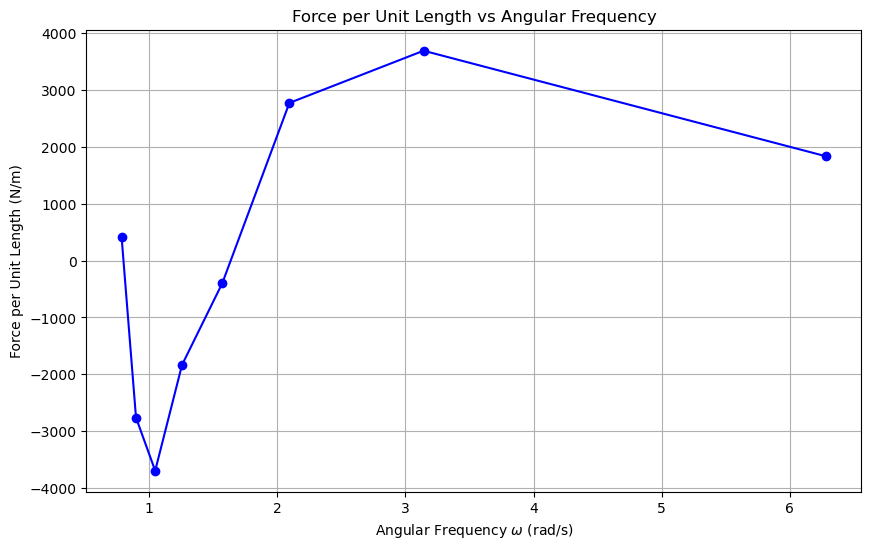

In [ ]:
# Plotting omega (angular frequency) on the x-axis and the force per unit length on the y-axis
# Since omega is constant for a given T in this model, we will represent varying T as different points

# Calculate omega for varying T from 0 to 8 seconds
T_values = np.arange(1, 9)  # Using intervals of 1 second up to 8 seconds
omega_values = 2 * np.pi / T_values

# Extracting force values from the previous calculation
force_values = list(average_force_per_interval.values())

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(omega_values, force_values, marker='o', linestyle='-', color='b')
plt.xlabel('Angular Frequency $\omega$ (rad/s)')
plt.ylabel('Force per Unit Length (N/m)')
plt.title('Force per Unit Length vs Angular Frequency')
plt.grid(True)
plt.show()


In [ ]:
# Re-import necessary library and re-define required functions and parameters after reset
import numpy as np
import matplotlib.pyplot as plt

# Parameters and function definitions
rho = 1025  # Density of seawater (kg/m^3)
CD = 1.0    # Drag coefficient
CM = 2.0    # Inertia coefficient
D = 0.5     # Diameter of the cylinder (m)
wave_heights = np.array([10, 9.5, 9, 8.5, 8, 7.5, 7])  # Wave heights (m)
amplitudes = wave_heights / 2  
T = 8.0     # Wave period (s)
omega = 2 * np.pi / T  # Angular frequency of the wave
time = np.arange(0, T, 0.01)  # Time settings

# Morison's equation force function
def morison_force(rho, CD, CM, D, u, du_dt):
    drag_force = 0.5 * rho * CD * D * np.abs(u) * u
    inertia_force = rho * CM * (np.pi * D**2 / 4) * du_dt
    return drag_force + inertia_force

# Wave properties functions
def wave_velocity(t, A, omega):
    return A * omega * np.sin(omega * t)

def wave_acceleration(t, A, omega):
    return A * omega**2 * np.cos(omega * t)

# Calculate and plot average forces for each wave height
average_forces = []
for height in wave_heights:
    A = height / 2
    u = wave_velocity(time, A, omega)
    du_dt = wave_acceleration(time, A, omega)
    F = morison_force(rho, CD, CM, D, u, du_dt)
    average_force = np.mean(np.abs(F))
    average_forces.append(average_force)
    
average_force_values = dict(zip(wave_heights, average_forces))
average_force_values
    


{10.0: 2257.67251763837,
 9.5: 2057.2086795409255,
 9.0: 1866.4165061150434,
 8.5: 1685.2579251388222,
 8.0: 1513.7029217412578,
 7.5: 1351.7486722863894,
 7.0: 1199.3330143564597}

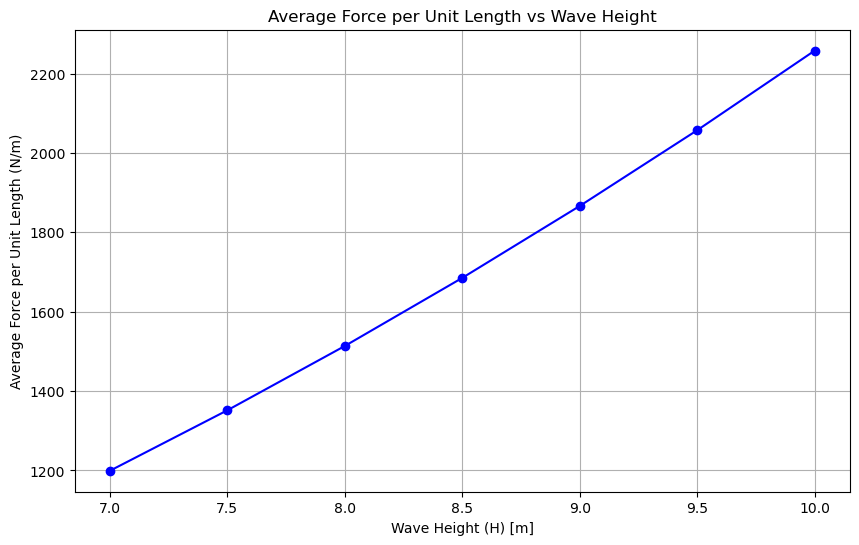

In [ ]:

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(wave_heights, average_forces, marker='o', linestyle='-', color='b')
plt.xlabel('Wave Height (H) [m]')
plt.ylabel('Average Force per Unit Length (N/m)')
plt.title('Average Force per Unit Length vs Wave Height')
plt.grid(True)
plt.show()


## Structure

In [ ]:
E_steel = 210e9  # Young's modulus for steel in N/m^2
F = 1e6  # Applied force in Newtons (N)
L = 10  # Original length of the segment in meters (m)
A = 0.5  # Cross-sectional area of the segment in square meters (m^2)

# Calculate the deformation
delta_L = (F * L) / (A * E_steel)

print(f"The deformation of the steel tower segment under the applied force is {delta_L:.6f} meters.")


The deformation of the steel tower segment under the applied force is 0.000095 meters.


In [ ]:
E_steel = 210e9  # Young's modulus for steel in N/m^2
density_air = 1.225  # kg/m^3 at sea level
wind_speed_base = 15  # m/s at base height
tower_height = 100  # m
diameter_tower = 4  # m (assuming a circular cross-section)
area_tower = np.pi * (diameter_tower / 2)**2  # m^2
I_tower = np.pi * (diameter_tower / 2)**4 / 4  # m^4, moment of inertia for a circular section
C_drag = 1.2  # Drag coefficient for a cylindrical object

# Assuming a linear increase in wind speed with height (simplified shear profile)
wind_speed_top = wind_speed_base * 1.2  # 20% increase at the top
average_wind_speed = (wind_speed_base + wind_speed_top) / 2
q_wind = 0.5 * density_air * average_wind_speed**2 * C_drag * diameter_tower  # N/m, equivalent uniform load

# Calculate maximum bending moment at the base (M = q*L^2/2 for a cantilever beam with uniform load)
M_max = q_wind * tower_height**2 / 2

# Calculate maximum stress at the base
y_max = diameter_tower / 2  # maximum distance from the neutral axis
sigma_max = M_max * y_max / I_tower

# Calculate maximum deflection at the top of the tower
delta_max = (q_wind * tower_height**4) / (8 * E_steel * I_tower)

# Print the results
print(f"Maximum bending moment at the base: {M_max:.2f} Nm")
print(f"Maximum stress at the base: {sigma_max:.2f} Pa")
print(f"Maximum deflection at the top: {delta_max:.6f} m")


Maximum bending moment at the base: 4002075.00 Nm
Maximum stress at the base: 636950.02 Pa
Maximum deflection at the top: 0.003791 m


In [ ]:
E_steel = 210e9  # Young's modulus for steel in N/m^2
rho_water = 1025  # kg/m^3, density of seawater
D = 4  # diameter of the tower in meters (assuming a circular cross-section)
C_D = 1.0  # Drag coefficient for the structure in water
C_M = 2.0  # Inertia coefficient for the structure
u = 2  # m/s, water particle velocity
du_dt = 5  # m/s^2, water particle acceleration
tower_height = 100  # m
submerged_length = 10  # m, the part of the tower submerged in water
I_tower = np.pi * (D / 2)**4 / 4  # m^4, moment of inertia for a circular section

# Morison equation
F_per_length_drag = (1/2) * rho_water * C_D * D * abs(u) * u
F_per_length_inertia = rho_water * C_M * (np.pi * D**2 / 4) * du_dt

# Total force per unit length from waves
F_wave_per_length = F_per_length_drag + F_per_length_inertia

# Integrate this force over the submerged length of the structure to get total wave force
F_wave_total = F_wave_per_length * submerged_length

# Calculate bending moment due to wave force at the base (assuming it acts at the center of the submerged length)
M_wave = F_wave_total * (tower_height - submerged_length / 2)

# Calculate maximum stress at the base with the combined load
y_max = D / 2  # maximum distance from the neutral axis
sigma_max = M_wave * y_max / I_tower

# Print the results considering wave forces
print(f"Wave force on submerged section (per unit length): {F_wave_per_length:.2f} N/m")
print(f"Total wave force on submerged section: {F_wave_total:.2f} N")
print(f"Total maximum bending moment at the base with wave force: {M_wave:.2f} Nm")
print(f"Maximum stress at the base with wave force: {sigma_max:.2f} Pa")


Wave force on submerged section (per unit length): 137005.30 N/m
Total wave force on submerged section: 1370052.99 N
Total maximum bending moment at the base with wave force: 130155033.86 Nm
Maximum stress at the base with wave force: 20714817.01 Pa


## DEL  --- not use


#### Simple version without rainflow counting

In [ ]:
import numpy as np
from scipy.signal import find_peaks

# Parameters for the simulation
n_cycles = 1000000  # Number of load cycles (lifetime of the turbine)
S_ref = 100  # Reference stress level for the material (MPa)
N_ref = 1e6  # Number of cycles to failure at the reference stress level
m = 3  # Slope of the S-N curve (typical for metals)

# Generate a synthetic load time series (simplified for demonstration)
np.random.seed(0)  # Seed for reproducibility
time = np.arange(n_cycles)
loads = np.abs(np.random.normal(0, S_ref/2, size=n_cycles))  # Normally distributed loads

# Find peaks in the load time series to identify load cycles
peaks, _ = find_peaks(loads)

# Use Rainflow counting to count cycles (simplified, real implementation is more complex)
cycle_amplitudes = loads[peaks]

# Calculate the damage for each cycle using the Palmgren-Miner rule
damages = (cycle_amplitudes / S_ref)**m / N_ref

# Total damage is the sum of individual damages
total_damage = np.sum(damages)

# Calculate the equivalent constant amplitude load for the total damage
DEL = S_ref * (total_damage * N_ref)**(1/m)

print(f"Total damage accumulated over the turbine's lifetime: {total_damage}")
print(f"Damage Equivalent Load (DEL): {DEL:.2f} MPa")


Total damage accumulated over the turbine's lifetime: 0.15914009695518622
Damage Equivalent Load (DEL): 5419.09 MPa


## EFL

Equivalent Fatigue Load (EFL): 2031.62 MPa
Total damage accumulated: 0.000838552310739831


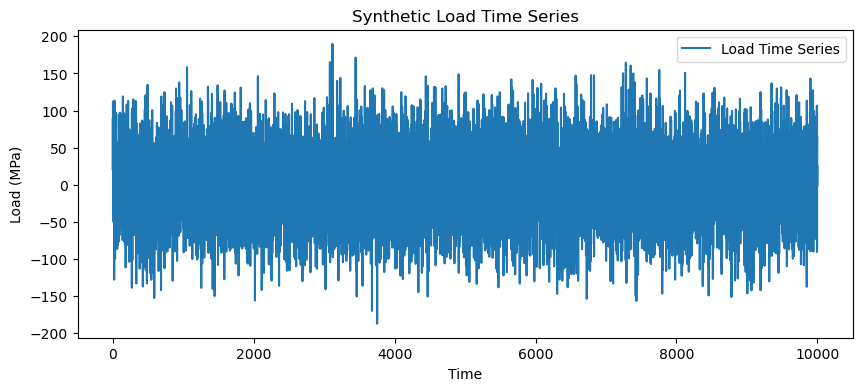

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# Parameters for the S-N curve
S_ref = 100  # Reference stress level (MPa)
N_ref = 1e6  # Number of cycles to failure at the reference stress level
m = 3  # Slope of the S-N curve (typical for metals)
target_cycles = 1e7  # Lifetime number of cycles

def calculate_efl(time_series, S_ref, N_ref, m, target_cycles):
    # Rainflow cycle counting
    peaks, _ = find_peaks(time_series)
    stress_ranges = time_series[peaks]
    
    # Damage calculation using Palmgren-Miner rule
    damages = (stress_ranges / S_ref)**m / N_ref
    
    # Sum of damage
    total_damage = np.sum(damages)
    
    # Calculate the EFL
    efl = (total_damage * target_cycles)**(1/m) * S_ref
    return efl, total_damage

# Generate a synthetic load time series
np.random.seed(0)  # Seed for reproducibility
n_points = 10000  # Number of points in the synthetic load time series
load_time_series = np.random.normal(0, S_ref/2, n_points)  # Normally distributed loads

# Calculate EFL
efl, total_damage = calculate_efl(load_time_series, S_ref, N_ref, m, target_cycles)

# Print the results
print(f"Equivalent Fatigue Load (EFL): {efl:.2f} MPa")
print(f"Total damage accumulated: {total_damage}")

# Plotting the load time series
plt.figure(figsize=(10, 4))
plt.plot(load_time_series, label='Load Time Series')
plt.xlabel('Time')
plt.ylabel('Load (MPa)')
plt.title('Synthetic Load Time Series')
plt.legend()
plt.show()


## Combine

Equivalent Fatigue Load (EFL) for 10m wave height: 174474.72 MPa
Total damage accumulated: 5.31E+02


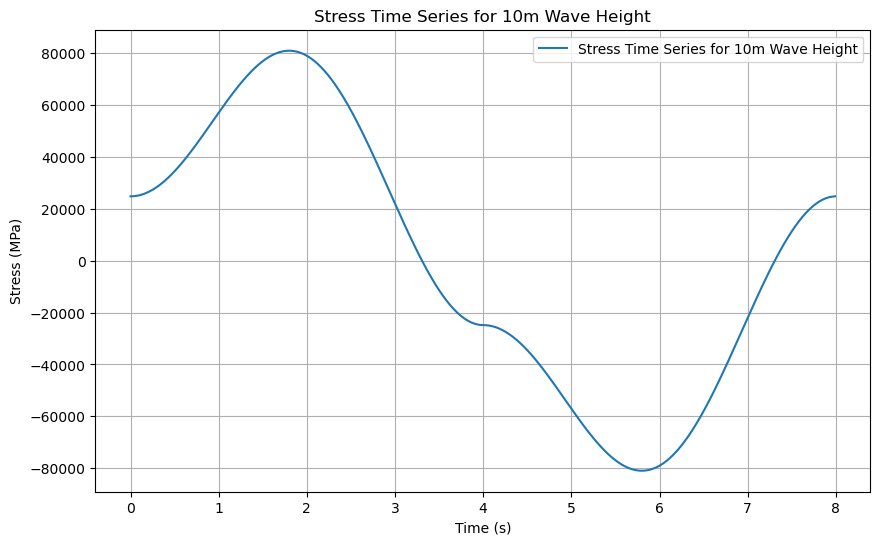

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# Parameters for Morison's equation for a wave height of 10 meters
rho = 1025  # Density of seawater (kg/m^3)
CD = 1.0    # Drag coefficient
CM = 2.0    # Inertia coefficient
D = 0.5     # Diameter of the cylinder (m)
wave_height = 10  # Single wave height (m)
amplitude = wave_height / 2  
T = 8.0     # Wave period (s)
omega = 2 * np.pi / T  # Angular frequency of the wave
cross_sectional_area = 0.05  # Cross-sectional area of the structure (example value)

# Morison's equation force function
def morison_force(rho, CD, CM, D, u, du_dt):
    drag_force = 0.5 * rho * CD * D * np.abs(u) * u
    inertia_force = rho * CM * (np.pi * D**2 / 4) * du_dt
    return drag_force + inertia_force

# Time settings
time = np.arange(0, T, 0.01)

# Calculate forces for a wave height of 10m
A = wave_height / 2
u = A * omega * np.sin(omega * time)  # Velocity
du_dt = A * omega**2 * np.cos(omega * time)  # Acceleration
F = morison_force(rho, CD, CM, D, u, du_dt)

# Assuming the cross-sectional area to convert force to stress
stress_time_series = F / cross_sectional_area  # Convert force to stress (MPa)

# Parameters for the S-N curve (for EFL calculation)
S_ref = 100  # Reference stress level (MPa)
N_ref = 1e6  # Number of cycles to failure at the reference stress level
m = 3        # Slope of the S-N curve (typical for metals)
target_cycles = 1e7  # Lifetime number of cycles

# EFL calculation function
def calculate_efl(stress_time_series, S_ref, N_ref, m, target_cycles):
    peaks, _ = find_peaks(stress_time_series)
    stress_ranges = stress_time_series[peaks]
    damages = (stress_ranges / S_ref)**m / N_ref
    total_damage = np.sum(damages)
    efl = (total_damage * target_cycles)**(1/m) * S_ref
    return efl, total_damage

# Calculate EFL for the stress time series
efl, total_damage = calculate_efl(stress_time_series, S_ref, N_ref, m, target_cycles)

# Output EFL and total damage
print(f"Equivalent Fatigue Load (EFL) for 10m wave height: {efl:.2f} MPa")
print(f"Total damage accumulated: {total_damage:.2E}")

# Plotting the force time series for 10m wave height
plt.figure(figsize=(10, 6))
plt.plot(time, stress_time_series, label='Stress Time Series for 10m Wave Height')
plt.xlabel('Time (s)')
plt.ylabel('Stress (MPa)')
plt.title('Stress Time Series for 10m Wave Height')
plt.legend()
plt.grid(True)
plt.show()


Wave Height: 10.0 m, EFL: 174474.72 MPa, Total Damage: 5.31E+02
Wave Height: 9.5 m, EFL: 157872.92 MPa, Total Damage: 3.93E+02
Wave Height: 9.0 m, EFL: 142121.90 MPa, Total Damage: 2.87E+02
Wave Height: 8.5 m, EFL: 127223.09 MPa, Total Damage: 2.06E+02
Wave Height: 8.0 m, EFL: 113176.17 MPa, Total Damage: 1.45E+02
Wave Height: 7.5 m, EFL: 99980.05 MPa, Total Damage: 9.99E+01
Wave Height: 7.0 m, EFL: 87635.16 MPa, Total Damage: 6.73E+01


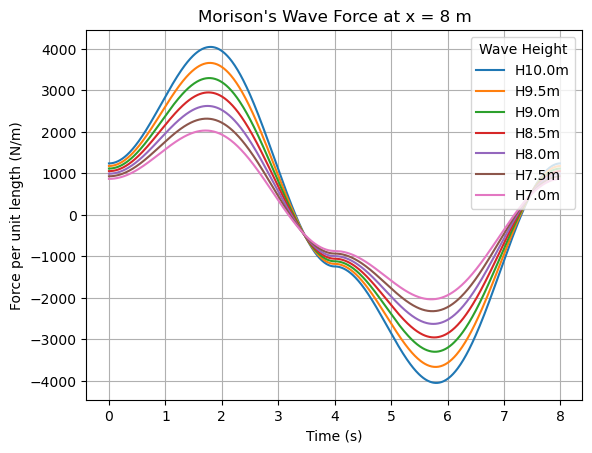

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

rho = 1025  # Density of seawater (kg/m^3)
CD = 1.0    # Drag coefficient
CM = 2.0    # Inertia coefficient
D = 0.5     # Diameter of the cylinder (m)
wave_heights = np.array([10, 9.5, 9, 8.5, 8, 7.5, 7])  # Wave heights (m)
amplitudes = wave_heights / 2  
T = 8.0     # Wave period (s)
omega = 2 * np.pi / T  # Angular frequency of the wave
cross_sectional_area = 0.05  # Cross-sectional area of the structure

def morison_force(rho, CD, CM, D, u, du_dt):
    drag_force = 0.5 * rho * CD * D * np.abs(u) * u
    inertia_force = rho * CM * (np.pi * D**2 / 4) * du_dt
    return drag_force + inertia_force

time = np.arange(0, T, 0.01)

# S-N Curve parameter
S_ref = 100  # Reference stress level (MPa)
N_ref = 1e6  # Number of cycles to failure at the reference stress level
m = 3        # Slope of the S-N curve (typical for metals)
target_cycles = 1e7  # Lifetime number of cycles

# EFL calculation function
def calculate_efl(stress_time_series, S_ref, N_ref, m, target_cycles):
    peaks, _ = find_peaks(stress_time_series)
    stress_ranges = stress_time_series[peaks]
    damages = (stress_ranges / S_ref)**m / N_ref
    total_damage = np.sum(damages)
    efl = (total_damage * target_cycles)**(1/m) * S_ref
    return efl, total_damage

# Loop over wave heights and calculate EFL for each
for height in wave_heights:
    A = height / 2
    u = A * omega * np.sin(omega * time)
    du_dt = A * omega**2 * np.cos(omega * time)
    F = morison_force(rho, CD, CM, D, u, du_dt)
    stress_time_series = F / cross_sectional_area
    efl, total_damage = calculate_efl(stress_time_series, S_ref, N_ref, m, target_cycles)
    print(f"Wave Height: {height} m, EFL: {efl:.2f} MPa, Total Damage: {total_damage:.2E}")

    # Plotting the force time series
    plt.plot(time, F, label=f'H{height}m')

# Finalizing the plot
plt.xlabel('Time (s)')
plt.ylabel('Force per unit length (N/m)')
plt.title("Morison's Wave Force at x = 8 m")
plt.legend(title='Wave Height', loc='upper right')
plt.grid(True)
plt.show()
